In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load data
train_df = pd.read_csv('Train_Data.csv')
test_df = pd.read_csv('Test_Data.csv')

# Preview
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
train_df.head()


Train shape: (1966, 9)
Test shape: (312, 8)


,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,73577.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,73580.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult


SEQN         12
RIAGENDR     18
PAQ605       13
BMXBMI       18
LBXGLU       13
DIQ010       18
LBXGLT       11
LBXIN         9
age_group    14
dtype: int64


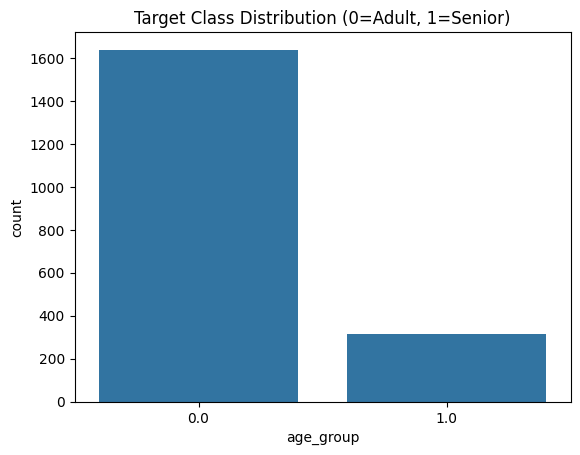

In [35]:
# Check nulls
print(train_df.isnull().sum())

# Map target variable
train_df['age_group'] = train_df['age_group'].map({'Adult': 0, 'Senior': 1})
train_df = train_df.dropna(subset=['age_group'])

# Check target distribution
sns.countplot(x='age_group', data=train_df)
plt.title('Target Class Distribution (0=Adult, 1=Senior)')
plt.show()


In [36]:
# Drop rows where 'age_group' is missing
train_df = train_df.dropna(subset=['age_group'])

# Now safely extract target
y = train_df['age_group']
X = train_df.drop(columns=['age_group', 'SEQN'])

# Same for test (remove SEQN)
X_test = test_df.drop(columns=['SEQN'])

# Separate categorical and numeric
cat_cols = ['RIAGENDR', 'PAQ605', 'DIQ010']
num_cols = ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']

# Imputers
cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='median')

# Apply imputation
X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])
X[num_cols] = num_imputer.fit_transform(X[num_cols])

X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])


In [37]:
# Check nulls
print(y.isnull().sum())

0


In [45]:
scaler = StandardScaler()

# Fit only on train, apply to both
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)



In [46]:
# Split for validation
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_val)

# Evaluate
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))


[[327  13]
 [ 39  12]]
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.93       340
         1.0       0.48      0.24      0.32        51

    accuracy                           0.87       391
   macro avg       0.69      0.60      0.62       391
weighted avg       0.84      0.87      0.85       391



In [54]:
# Predict on test set
final_preds = model.predict(X_test_scaled)

# Load sample submission
submission = pd.DataFrame({
    'age_group': final_preds
})

submission.to_csv('submission.csv', index=False)

In [ ]:
submission


,age_group
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
307,0.0
308,0.0
309,0.0
310,0.0
